Link to Dataset: https://www.kaggle.com/datasets/nelgiriyewithana/world-stock-prices-daily-updating/data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for visualizations
sns.set_theme(style="whitegrid")


In [ ]:
df = pd.read_csv("/content/World-Stock-Prices-Dataset.csv")


In [ ]:
df.head()


,Date,Open,High,Low,Close,Volume,Brand_Name,Ticker,Industry_Tag,Country,Dividends,Stock Splits,Capital Gains
0,2025-01-24 00:00:00-05:00,8.460000,8.835000,8.335000,8.400000,9068531.0,peloton,PTON,fitness,usa,0.0,0.0,NaN
1,2025-01-24 00:00:00-05:00,61.720001,62.009998,61.435001,61.919998,15703844.0,the coca-cola company,KO,food & beverage,usa,0.0,0.0,NaN
2,2025-01-24 00:00:00-05:00,942.159973,946.040405,933.554993,939.679993,1539412.0,costco,COST,retail,usa,0.0,0.0,NaN
3,2025-01-24 00:00:00-05:00,234.970001,236.399994,232.929993,234.850006,25674951.0,amazon,AMZN,e-commerce,usa,0.0,0.0,NaN
4,2025-01-24 00:00:00-05:00,224.975006,225.630005,221.410004,222.779999,52621751.0,apple,AAPL,technology,usa,0.0,0.0,NaN


In [ ]:
# Shape of the dataset
print("DataFrame Shape:", df.shape)

# Data types
print("\nData Types:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


DataFrame Shape: (302482, 13)

Data Types:
Date              object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
Brand_Name        object
Ticker            object
Industry_Tag      object
Country           object
Dividends        float64
Stock Splits     float64
Capital Gains    float64
dtype: object

Missing Values:
Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Brand_Name            0
Ticker                0
Industry_Tag          0
Country               0
Dividends             0
Stock Splits          0
Capital Gains    302480
dtype: int64


Shape: Tells you how many rows and columns there are.
Data Types: Whether columns are numeric, objects (strings), or dates.
Missing Values: Which columns have NaNs and how many.

Capital Gains is empty so it has to go

In [ ]:
df.drop(columns=["Capital Gains"], inplace=True)


In [ ]:
print("DataFrame Shape:", df.shape)


DataFrame Shape: (302482, 12)


In [ ]:
# Option 1: Using the .nunique() method
unique_count = df["Ticker"].nunique()
print("Number of unique Ticker values:", unique_count)

Number of unique Ticker values: 61


In [ ]:
# 1. Convert the Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# 2. View the earliest and latest dates
start_date = df["Date"].min()
end_date = df["Date"].max()

print(f"Stocks are available from {start_date.date()} to {end_date.date()}")



Stocks are available from 2000-01-03 to 2025-01-24


<ipython-input-8-134fca8856c0>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df["Date"] = pd.to_datetime(df["Date"])


In [ ]:
print(df.shape)


print("Columns in df:", df.columns)


(302482, 12)
Columns in df: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Brand_Name',
       'Ticker', 'Industry_Tag', 'Country', 'Dividends', 'Stock Splits'],
      dtype='object')


Stock prices are available from 2000-01-03 till 2024-12-20


In [ ]:
# Sort by date to ensure consecutive order
df = df.sort_values("Date")

# Calculate difference between consecutive timestamps
df["time_diff"] = df["Date"].diff()

df["time_diff"].describe()


,time_diff
count,302481
mean,0 days 00:43:34.442560028
std,0 days 05:50:20.444323635
min,0 days 00:00:00
25%,0 days 00:00:00
50%,0 days 00:00:00
75%,0 days 00:00:00
max,7 days 00:00:00


Multiple Tickers Mixed: Suppose you have two different stocks (e.g., AAPL, MSFT). When the DataFrame is sorted only by date, rows for AAPL and MSFT can be interleaved.
Misleading Time Differences: The difference between 2024-01-01 for AAPL and 2024-01-01 for MSFT is zero, but these are two different tickers—it’s not meaningful to treat them as consecutive time points for the same stock.
Distorted Statistics: As a result, your mean and median time differences might show 0 days 00:00:00 for most row pairs (because many tickers have the same date/time but are different stocks), and a few larger gaps pull the average up (e.g., 7 days).

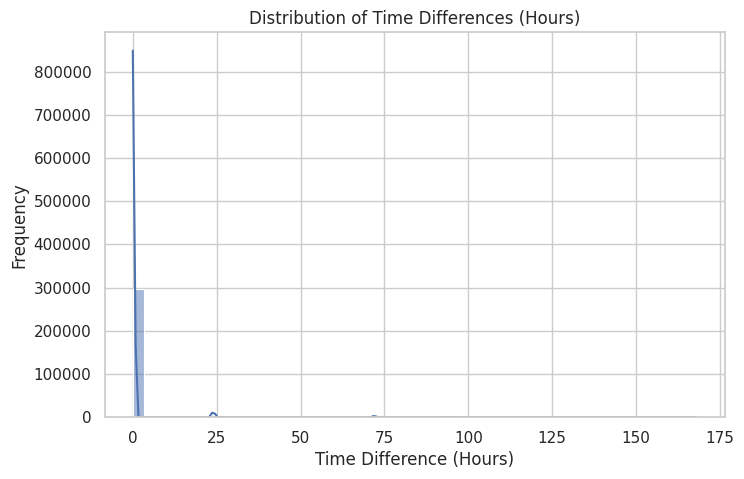

In [ ]:
# Convert Timedelta to hours (float)
df["time_diff_hours"] = df["time_diff"].dt.total_seconds() / 3600.0

# Drop rows with NaN time_diff (the first row has no previous timestamp)
df_clean = df.dropna(subset=["time_diff_hours"])

# Plot distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df_clean, x="time_diff_hours", bins=50, kde=True)
plt.title("Distribution of Time Differences (Hours)")
plt.xlabel("Time Difference (Hours)")
plt.ylabel("Frequency")
plt.show()

Lets first filter the data based on stocks and then stack them choronologically

Tall Peak Around 24 Hours: Suggests that most consecutive timestamps (per ticker) occur roughly one day apart — consistent with daily trading data.
Smaller Peak (or peaks) around 72 Hours: Often corresponds to weekend gaps (e.g., from Friday’s close to Monday’s open = 3 days).

<ipython-input-12-a265f696fd27>:23: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df2["Date"] = pd.to_datetime(df2["Date"], errors="coerce")


count    302421.000000
mean         34.590749
std          21.265446
min           0.000000
25%          24.000000
50%          24.000000
75%          24.000000
max         168.000000
Name: time_diff_hours, dtype: float64


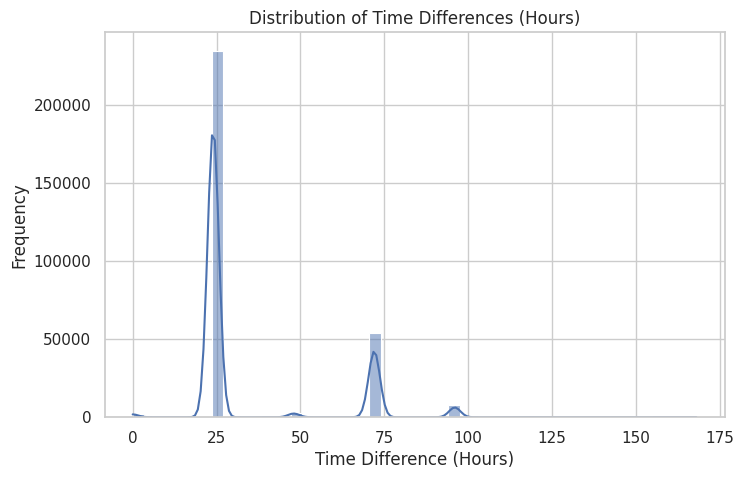

In [ ]:
################################################################################
# 1. Import libraries
################################################################################
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

################################################################################
# 2. Read the CSV file
#    - If your CSV has malformed rows, use 'on_bad_lines="skip"'
#      or fix them manually.
################################################################################
df2 = pd.read_csv(
    "/content/World-Stock-Prices-Dataset.csv",
    on_bad_lines="skip",      # Skip lines with errors in the CSV
    low_memory=False          # Helps when columns have mixed types
)

################################################################################
# 3. Convert the 'Date' column to a proper datetime
#    - If there are invalid date strings, coerce them to NaT instead of erroring.
################################################################################
df2["Date"] = pd.to_datetime(df2["Date"], errors="coerce")

# Drop rows where 'Date' is NaT (unparseable dates)
df2.dropna(subset=["Date"], inplace=True)

################################################################################
# 4. Sort the DataFrame so that each Ticker's rows are in chronological order
################################################################################
df2 = df2.sort_values(["Ticker", "Date"])

################################################################################
# 5. Calculate time differences between consecutive rows
#    (only within the same ticker)
################################################################################
df2["time_diff"] = df2["Date"].diff()

# Where the ticker changes from one row to the next, set time_diff to NaN
df2["time_diff"] = df2["time_diff"].where(df2["Ticker"].eq(df2["Ticker"].shift()))

################################################################################
# 6. Convert these time differences to hours (float)
################################################################################
df2["time_diff_hours"] = df2["time_diff"].dt.total_seconds() / 3600.0

# Drop rows with missing time_diff_hours (first row of each ticker, or invalid)
df_clean = df2.dropna(subset=["time_diff_hours"])

################################################################################
# 7. Get a quick descriptive summary
################################################################################
print(df_clean["time_diff_hours"].describe())

################################################################################
# 8. Plot the distribution of time_diff_hours
################################################################################
plt.figure(figsize=(8, 5))
sns.histplot(data=df_clean, x="time_diff_hours", bins=50, kde=True)
plt.title("Distribution of Time Differences (Hours)")
plt.xlabel("Time Difference (Hours)")
plt.ylabel("Frequency")
plt.show()


All rows with the same Ticker end up grouped together.
Within each Ticker group, the rows are then sorted in ascending order by Date.

For Stability reasons we would choose only stocks from US

In [ ]:
unique_countries = df_clean["Country"].unique()
print("Unique Country values:", unique_countries)

Unique Country values: ['usa' 'germany' 'japan' 'switzerland' 'france' 'netherlands' 'canada']


In [ ]:

# Number of rows (and columns) in the original df
print("Original DataFrame shape:", df_clean.shape)
# or
print("Number of rows in original DataFrame:", len(df_clean))



df_usa = df_clean[df_clean["Country"] == "usa"]
df_usa.head()  # to view the first few rows


Original DataFrame shape: (302421, 15)
Number of rows in original DataFrame: 302421


,Date,Open,High,Low,Close,Volume,Brand_Name,Ticker,Industry_Tag,Country,Dividends,Stock Splits,Capital Gains,time_diff,time_diff_hours
302427,2000-01-04 00:00:00-05:00,0.820377,0.838376,0.766854,0.776801,512377600.0,apple,AAPL,technology,usa,0.0,0.0,NaN,1 days,24.0
302382,2000-01-05 00:00:00-05:00,0.786273,0.837902,0.780590,0.788168,778321600.0,apple,AAPL,technology,usa,0.0,0.0,NaN,1 days,24.0
302351,2000-01-06 00:00:00-05:00,0.804273,0.810904,0.719961,0.719961,767972800.0,apple,AAPL,technology,usa,0.0,0.0,NaN,1 days,24.0
302339,2000-01-07 00:00:00-05:00,0.731329,0.765433,0.723751,0.754065,460734400.0,apple,AAPL,technology,usa,0.0,0.0,NaN,1 days,24.0
302296,2000-01-10 00:00:00-05:00,0.773011,0.774905,0.718067,0.740802,505064000.0,apple,AAPL,technology,usa,0.0,0.0,NaN,3 days,72.0


In [ ]:

print("Shape of df_usa:", df_usa.shape)
print("Number of rows in df_usa:", len(df_usa))


Shape of df_usa: (237552, 15)
Number of rows in df_usa: 237552


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam



In [ ]:


# 1) Pick one ticker (e.g., "AAPL")
df_apple = df_clean[df_clean["Ticker"] == "AAPL"].copy()

df_apple["Date"] = pd.to_datetime(df_apple["Date"], utc=True)


# 2) Sort by date in ascending order
df_apple = df_apple.sort_values("Date")
df_apple.reset_index(drop=True, inplace=True)

# Quick check
print("Number of rows for AAPL:", len(df_apple))
print(df_apple.head())

df_apple["Date"] = pd.to_datetime(df_apple["Date"])



Number of rows for AAPL: 6315
                       Date      Open      High       Low     Close  \
0 2000-01-04 05:00:00+00:00  0.820377  0.838376  0.766854  0.776801   
1 2000-01-05 05:00:00+00:00  0.786273  0.837902  0.780590  0.788168   
2 2000-01-06 05:00:00+00:00  0.804273  0.810904  0.719961  0.719961   
3 2000-01-07 05:00:00+00:00  0.731329  0.765433  0.723751  0.754065   
4 2000-01-10 05:00:00+00:00  0.773011  0.774905  0.718067  0.740802   

        Volume  Dividends  Stock Splits Brand_Name Ticker Industry_Tag  \
0  512377600.0        0.0           0.0      apple   AAPL   technology   
1  778321600.0        0.0           0.0      apple   AAPL   technology   
2  767972800.0        0.0           0.0      apple   AAPL   technology   
3  460734400.0        0.0           0.0      apple   AAPL   technology   
4  505064000.0        0.0           0.0      apple   AAPL   technology   

  Country  Capital Gains time_diff  time_diff_hours  
0     usa            NaN    1 days          

In [ ]:
# Select relevant columns as features
feature_cols = ["Open", "High", "Low", "Close", "Volume"]

# Extract just those columns
df_features = df_apple[feature_cols]

# Convert to NumPy array
data = df_features.values

print("Shape of features array:", data.shape)


Shape of features array: (6315, 5)


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# data_scaled is the scaled version of [Open, High, Low, Close, Volume]


In [ ]:
window_size = 60  # e.g., use past 60 days to predict the next day's price

X, y = [], []

# data_scaled[:, 3] is the 'Close' column in scaled form
for i in range(window_size, len(data_scaled)):
    # The past 'window_size' days (all features)
    X.append(data_scaled[i - window_size : i, :])
    # The "next day" close
    y.append(data_scaled[i, 3])

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)  # (number_of_samples, 60, 5)
print("y shape:", y.shape)  # (number_of_samples,)


X shape: (6255, 60, 5)
y shape: (6255,)


In [ ]:
import random
import numpy as np
import tensorflow as tf


train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Train set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)

# Set random seed for reproducibility
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)
tf.random.set_seed(random_seed)


Train set size: (5004, 60, 5) (5004,)
Test set size: (1251, 60, 5) (1251,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model1.fit(
    X_train, y_train,
    epochs=10,               # Increase this for better training
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 6.0417e-04 - val_loss: 0.0014
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 8.1958e-05 - val_loss: 0.0068
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 7.5669e-05 - val_loss: 0.0052
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 5.8881e-05 - val_loss: 5.8878e-04
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 5.2976e-05 - val_loss: 7.8793e-04
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.2409e-05 - val_loss: 0.0011
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.2944e-05 - val_loss: 4.8421e-04
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 3.8836e-05 - val_loss: 9.9437e-04
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.9752e-05 - val_loss: 3.8434e-04
Epoch 10/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.9862e-05 - val_loss: 4.1954e-04


Predicting the horizon for next 7 days


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


<ipython-input-59-8f283da61945>:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_entry[feature_cols.index("Close")] = pred  # Update "Close"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted stock prices for the next week: [245.68524905 232.99170048 212.6019215  188.35932163 162.97317793
 138.22217916 115.19191689]


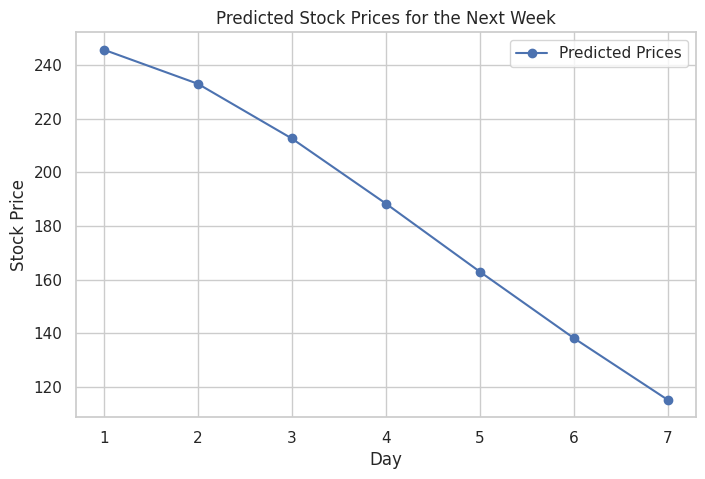

In [ ]:
import numpy as np

def predict_next_week(model, last_sequence, scaler, num_days=7):
    """
    Predicts stock prices for the next 'num_days' days.

    Args:
        model: Trained LSTM model.
        last_sequence: Last 'window_size' days of data (scaled).
        scaler: MinMaxScaler instance used for scaling the data.
        num_days: Number of days to predict (default: 7).

    Returns:
        List of predicted values (unscaled).
    """
    predictions = []
    input_seq = last_sequence.copy()

    for _ in range(num_days):
        # Reshape to match model input shape
        input_seq = input_seq.reshape((1, input_seq.shape[0], input_seq.shape[1]))

        # Predict next value
        pred = model.predict(input_seq)

        # Append prediction
        predictions.append(pred[0, 0])

        # Update input sequence
        new_entry = np.zeros((input_seq.shape[2],))
        new_entry[feature_cols.index("Close")] = pred  # Update "Close"
        input_seq = np.append(input_seq[0, 1:, :], [new_entry], axis=0)

    # Inverse transform predictions
    temp = np.zeros((len(predictions), len(feature_cols)))
    temp[:, feature_cols.index("Close")] = predictions
    inv_predictions = scaler.inverse_transform(temp)[:, feature_cols.index("Close")]

    return inv_predictions

# Use the last 'window_size' days from your dataset
last_sequence = data_scaled[-window_size:]

# Predict next 7 days
next_week_predictions = predict_next_week(model1, last_sequence, scaler, num_days=7)

# Print predicted prices
print("Predicted stock prices for the next week:", next_week_predictions)

# Plot the predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, 8), next_week_predictions, marker='o', label="Predicted Prices")
plt.title("Predicted Stock Prices for the Next Week")
plt.xlabel("Day")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Rebuild the model using the Functional API
inputs = Input(shape=(window_size, len(feature_cols)), name="input_layer")
x = LSTM(50, return_sequences=True, kernel_initializer='glorot_uniform', name="lstm_layer_1")(inputs)
x = Dropout(0.2, name="dropout_1")(x)

x = LSTM(50, return_sequences=False, kernel_initializer='glorot_uniform', name="lstm_layer_2")(x)
x = Dropout(0.2, name="dropout_2")(x)

outputs = Dense(1, name="output_layer")(x)

model1 = Model(inputs=inputs, outputs=outputs)
model1.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error")

# Train the model
history = model1.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 8.7647e-05 - val_loss: 9.7375e-04
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.3509e-05 - val_loss: 6.0297e-04
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.6574e-05 - val_loss: 0.0016
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 5.2582e-05 - val_loss: 5.9983e-04
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.5015e-05 - val_loss: 0.0011
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 4.2224e-05 - val_loss: 0.0011
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 3.7966e-05 - val_loss: 8.3111e-04
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.2900e-05 - val_loss: 0.0020
Epoch 10/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.9358e-05 - val_loss: 8.0198e-04


Trying to visualize hidden state of the model

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Function to extract hidden states
def extract_hidden_states(model, input_data):
    """
    Extracts the hidden states from the LSTM layers of the given model.

    Args:
        model: Trained LSTM model.
        input_data: Input data for which to calculate the hidden states (e.g., X_train or X_test).

    Returns:
        List of hidden states for each LSTM layer over time.
    """
    # Identify LSTM layers in the model
    lstm_layers = [layer for layer in model.layers if isinstance(layer, tf.keras.layers.LSTM)]

    # Build intermediate models for each LSTM layer
    intermediate_models = [
        Model(inputs=model.input, outputs=layer.output) for layer in lstm_layers
    ]

    # Store hidden states for all layers
    hidden_states = []

    for intermediate_model in intermediate_models:
        # Get the output of the LSTM layer
        layer_output = intermediate_model.predict(input_data)
        hidden_states.append(layer_output)

    return hidden_states

# Call the model once to define the input shape before extracting hidden states
# This could be a dummy prediction or using some actual data
_ = model1.predict(X_test[:1]) # predict on a small slice of the data to initialize model input

# Test the function with X_test
hidden_states = extract_hidden_states(model1, X_test)

# Visualize hidden states over time for the first LSTM layer
hidden_states_layer_1 = hidden_states[0]  # Assuming model1 has at least one LSTM layer

# Example visualization for a single sequence (first sample)
sequence_idx = 0  # Index of the sample to visualize
hidden_state_sequence = hidden_states_layer_1[sequence_idx]

plt.figure(figsize=(10, 6))
for unit_idx in range(hidden_state_sequence.shape[1]):
    plt.plot(hidden_state_sequence[:, unit_idx], label=f"Unit {unit_idx+1}")

plt.title("Hidden States Over Time for a Single Sequence")
plt.xlabel("Time Step")
plt.ylabel("Hidden State Value")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


ValueError: The layer sequential_3 has never been called and thus has no defined input.

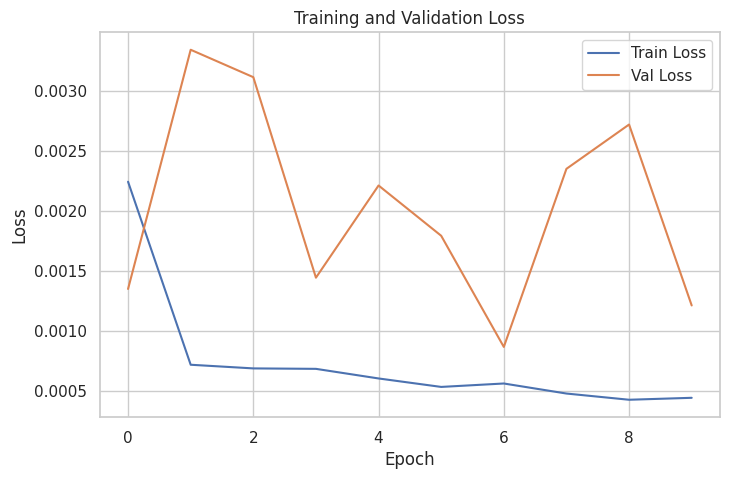

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
y_pred = model1.predict(X_test)

# y_pred is still in scaled form, so we need to invert the scaling
# Specifically, we only scaled "Close" among 5 features.
# Create a dummy array to pass into scaler.inverse_transform
temp = np.zeros((len(y_pred), len(feature_cols)))
temp[:, 3] = y_pred[:, 0]  # put our predicted close in the 'close' column index=3
inv_pred = scaler.inverse_transform(temp)  # invert
inv_pred_close = inv_pred[:, 3]            # actual predicted close prices

# Similarly, invert y_test
temp_test = np.zeros((len(y_test), len(feature_cols)))
temp_test[:, 3] = y_test
inv_test = scaler.inverse_transform(temp_test)
inv_test_close = inv_test[:, 3]


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


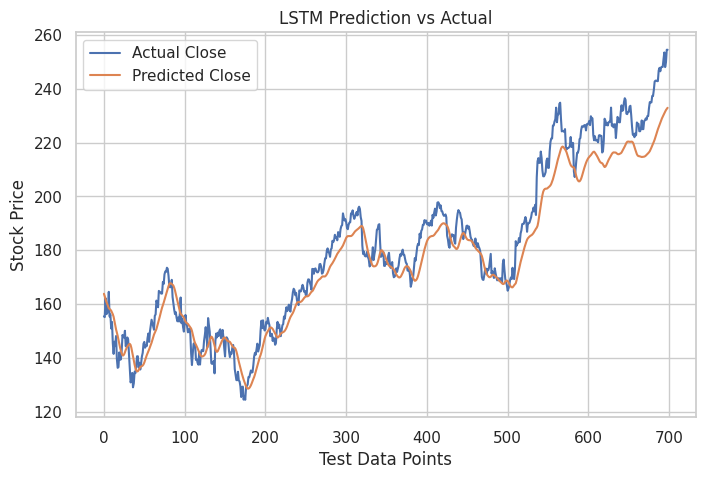

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(inv_test_close, label="Actual Close")
plt.plot(inv_pred_close, label="Predicted Close")
plt.title("LSTM Prediction vs Actual")
plt.xlabel("Test Data Points")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [ ]:
model2 = Sequential()
model2.add(LSTM(50, return_sequences=True, input_shape=(window_size, len(feature_cols)),
               kernel_initializer=tf.keras.initializers.glorot_uniform(seed=random_seed)))
model2.add(Dropout(0.3, seed=random_seed))  # Set seed for Dropout

model2.add(LSTM(50, kernel_initializer=tf.keras.initializers.glorot_uniform(seed=random_seed)))
model2.add(Dropout(0.3, seed=random_seed))  # Set seed for Dropout

model2.add(Dense(1))  # Output layer
model2.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model2.fit(
    X_train, y_train,
    epochs=10,               # Increase this for better training
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0096 - val_loss: 0.0022
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013 - val_loss: 0.0065
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012 - val_loss: 0.0036
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.4597e-04 - val_loss: 0.0024
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.4617e-04 - val_loss: 0.0011
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.9495e-04 - val_loss: 0.0011
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.2640e-04 - val_loss: 0.0019
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.6416e-04 - val_loss: 0.0023
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.3141e-04 - val_loss: 0.0019


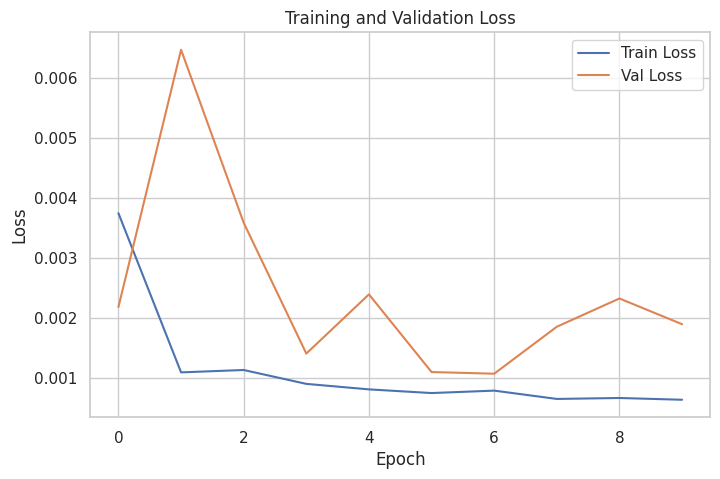

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# testing the models performance

y_pred = model2.predict(X_test)

# y_pred is still in scaled form, so we need to invert the scaling
# Specifically, we only scaled "Close" among 5 features.
# Create a dummy array to pass into scaler.inverse_transform
temp = np.zeros((len(y_pred), len(feature_cols)))
temp[:, 3] = y_pred[:, 0]  # put our predicted close in the 'close' column index=3
inv_pred = scaler.inverse_transform(temp)  # invert
inv_pred_close = inv_pred[:, 3]            # actual predicted close prices

# Similarly, invert y_test
temp_test = np.zeros((len(y_test), len(feature_cols)))
temp_test[:, 3] = y_test
inv_test = scaler.inverse_transform(temp_test)
inv_test_close = inv_test[:, 3]


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


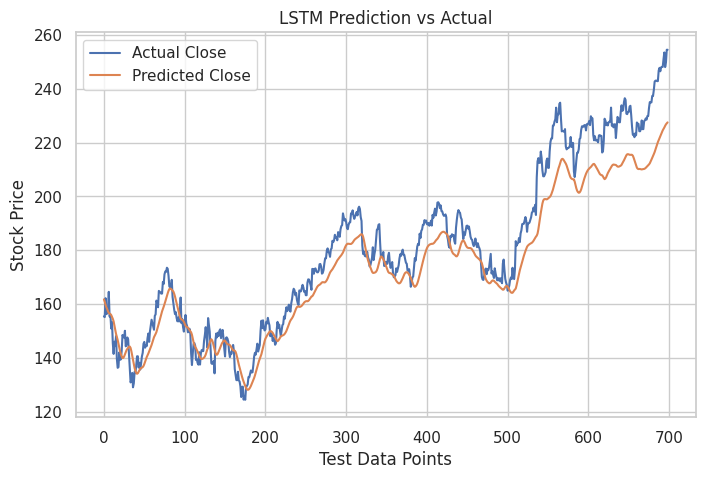

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(inv_test_close, label="Actual Close")
plt.plot(inv_pred_close, label="Predicted Close")
plt.title("LSTM Prediction vs Actual")
plt.xlabel("Test Data Points")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


This time lets all the US data and see how the model performs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
4703/4703 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - loss: 0.0020 - val_loss: 1.8300e-04
Epoch 2/20
4703/4703 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 9.4744e-04 - val_loss: 1.9002e-04
Epoch 3/20
4703/4703 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - loss: 9.1451e-04 - val_loss: 1.7281e-04
Epoch 4/20
4703/4703 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 8.6150e-04 - val_loss: 1.2579e-04
Epoch 5/20
4703/4703 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 8.1378e-04 - val_loss: 1.0775e-04
Epoch 6/20
4703/4703 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 8.0460e-04 - val_loss: 1.0137e-04
Epoch 7/20
4703/4703 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 7.8061e-04 - val_loss: 1.2139e-04
Epoch 8/20
4703/4703 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - loss: 7.8298e-04 - val_loss: 1.3916e-04
Epoch 9/20
4703/4703 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - loss: 7.7460e-04 - val_loss: 1.2058e-04
Epoch 10/20
4703/4703 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - loss: 8.0069e-04 - val_loss: 1.6149e-04
Epoch 11/20
4703/4703 ━━━━━━━━━━━

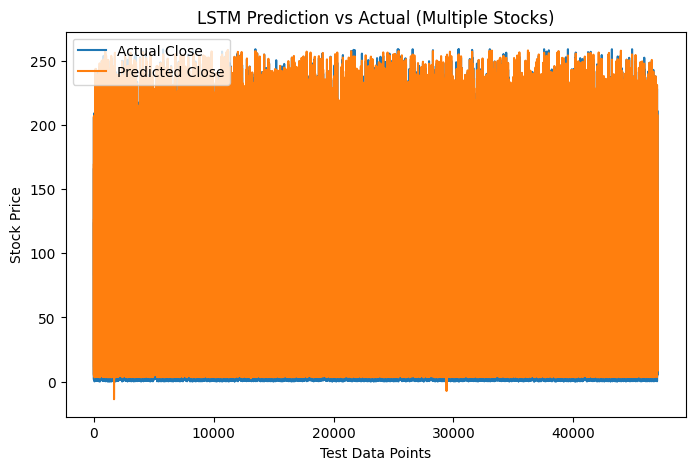

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random
import numpy as np
import tensorflow as tf

# Random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)

# Data Preparation for Multiple Stocks
window_size = 30  # Window size for time series
feature_cols = ["Open", "High", "Low", "Close", "Volume"]  # Features to use

# Dictionary to hold scalers for each stock
scalers = {}

# Prepare data for all stocks
data_by_stock = {}
for ticker, group in df_usa.groupby("Ticker"):
    # Sort by Date
    group = group.sort_values("Date").reset_index(drop=True)

    # Scale features
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(group[feature_cols])
    scalers[ticker] = scaler  # Save the scaler for inverse transform later

    # Create windows
    X, y = [], []
    for i in range(len(scaled_data) - window_size):
        X.append(scaled_data[i:i+window_size])
        y.append(scaled_data[i+window_size, feature_cols.index("Close")])  # Target: next day's "Close"
    data_by_stock[ticker] = (np.array(X), np.array(y))

# Combine all stocks into one dataset
X_all = np.concatenate([data[0] for data in data_by_stock.values()])
y_all = np.concatenate([data[1] for data in data_by_stock.values()])

# Split into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=random_seed)

# Build LSTM Model (model3)
model3 = Sequential()
model3.add(LSTM(50, return_sequences=True, input_shape=(window_size, len(feature_cols)),
                kernel_initializer=tf.keras.initializers.glorot_uniform(seed=random_seed)))
model3.add(Dropout(0.3, seed=random_seed))

model3.add(LSTM(50, kernel_initializer=tf.keras.initializers.glorot_uniform(seed=random_seed)))
model3.add(Dropout(0.3, seed=random_seed))

model3.add(Dense(1))  # Predict the "Close" price
model3.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error")

# Train the model
history = model3.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Predictions for test data
y_pred = model3.predict(X_test)

# Inverse transform predictions and true values
ticker_scaler = scalers[list(data_by_stock.keys())[0]]  # Use any scaler for inverse transformation
temp = np.zeros((len(y_pred), len(feature_cols)))
temp[:, feature_cols.index("Close")] = y_pred[:, 0]
inv_pred_close = ticker_scaler.inverse_transform(temp)[:, feature_cols.index("Close")]

temp = np.zeros((len(y_test), len(feature_cols)))
temp[:, feature_cols.index("Close")] = y_test
inv_test_close = ticker_scaler.inverse_transform(temp)[:, feature_cols.index("Close")]

# Plot actual vs predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(inv_test_close, label="Actual Close")
plt.plot(inv_pred_close, label="Predicted Close")
plt.title("LSTM Prediction vs Actual (Multiple Stocks)")
plt.xlabel("Test Data Points")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [ ]:
# Save the model to an .h5 file
model3.save('model3_lstm_stock_prediction.h5')

print("Model saved as 'model3_lstm_stock_prediction.h5'")


Model saved as 'model3_lstm_stock_prediction.h5'


Saving the model in h5 format


                          Date        Open        High         Low  \
58   2024-12-24 00:00:00-05:00  255.490005  258.209991  255.289993   
89   2024-12-24 00:00:00-05:00  255.369995  258.209991  255.309998   
162  2024-12-23 00:00:00-05:00  254.770004  255.649994  253.449997   
185  2024-12-20 00:00:00-05:00  248.039993  255.000000  245.690002   
265  2024-12-20 00:00:00-05:00  248.119995  255.000000  246.300003   

          Close       Volume  Dividends  Stock Splits Brand_Name Ticker  \
58   258.200012   23234700.0        0.0           0.0      apple   AAPL   
89   258.200012   20965006.0        0.0           0.0      apple   AAPL   
162  255.270004   40828600.0        0.0           0.0      apple   AAPL   
185  254.490005  146890100.0        0.0           0.0      apple   AAPL   
265  254.490005  134755683.0        0.0           0.0      apple   AAPL   

    Industry_Tag Country  Capital Gains  
58    technology     usa            NaN  
89    technology     usa            NaN  
16

<ipython-input-3-052be8d03a25>:25: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df["Date"] = pd.to_datetime(df["Date"])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


<ipython-input-3-052be8d03a25>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_entry[feature_cols.index("Close")] = pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Prices for the Next 7 Days: [255.54194409 190.74722786  97.94934389  50.79065235  26.62190179
  13.38088636   7.77172105]


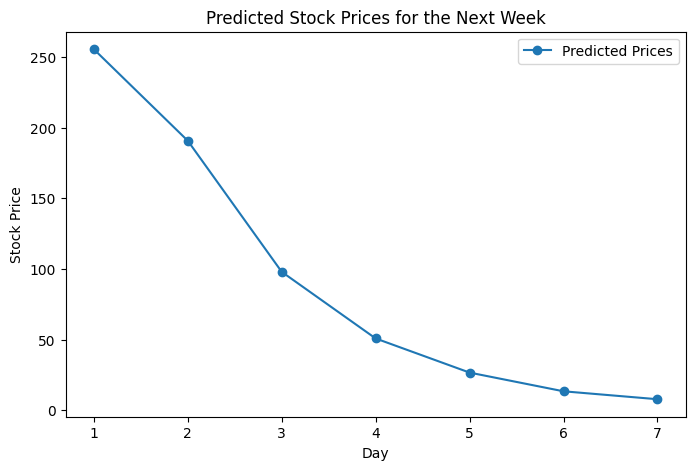

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model3 = load_model("/content/my_lstm_model.h5")

# Function to preprocess data and create input windows
def preprocess_and_predict(df_clean, ticker, scaler, model, feature_cols, window_size=30):
    # Debug print to check input DataFrame for the specified ticker
    print(df_clean[df_clean["Ticker"] == ticker].head())

    # Read the uploaded CSV file
    df = df_clean

    # Filter for US stocks and the specified ticker
    df = df[(df["Country"] == "usa") & (df["Ticker"] == ticker)].copy()

    if df.empty:
        raise ValueError(f"No data found for ticker {ticker} in US stocks.")

    # Sort data by date
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values("Date")

    # Select features and scale data
    data = df[feature_cols].values
    scaled_data = scaler.fit_transform(data)

    # Use the last window_size days to predict the next 7 days
    last_sequence = scaled_data[-window_size:]

    # Predict the next 7 days
    predictions = []
    input_seq = last_sequence.copy()

    for _ in range(7):
        input_seq = input_seq.reshape((1, input_seq.shape[0], input_seq.shape[1]))
        pred = model.predict(input_seq)
        predictions.append(pred[0, 0])

        # Update the sequence with the predicted value
        new_entry = np.zeros((input_seq.shape[2],))
        new_entry[feature_cols.index("Close")] = pred
        input_seq = np.append(input_seq[0, 1:, :], [new_entry], axis=0)

    # Inverse transform predictions
    temp = np.zeros((len(predictions), len(feature_cols)))
    temp[:, feature_cols.index("Close")] = predictions
    inv_predictions = scaler.inverse_transform(temp)[:, feature_cols.index("Close")]

    return inv_predictions

# Function to plot predictions
def plot_predictions(predictions):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 8), predictions, marker="o", label="Predicted Prices")
    plt.title("Predicted Stock Prices for the Next Week")
    plt.xlabel("Day")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

# Example Usage
file_path = "/content/World-Stock-Prices-Dataset.csv"  # Replace with your CSV file path
ticker = "AAPL"  # Replace with the stock ticker you want to predict
feature_cols = ["Open", "High", "Low", "Close", "Volume"]
scaler = MinMaxScaler()

try:
    # Load the data
    df_clean = pd.read_csv(file_path)  # Ensure the CSV path is correct
    predictions = preprocess_and_predict(df_clean, ticker, scaler, model3, feature_cols)
    print("Predicted Prices for the Next 7 Days:", predictions)
    plot_predictions(predictions)
except ValueError as e:
    print(e)
except Exception as e:
    print("An unexpected error occurred:", e)


Bad results, maybe scaling of data before training is the issue

<ipython-input-1-10d40ced4257>:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_apple["Date"] = pd.to_datetime(df_apple["Date"])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0250 - val_loss: 0.9135
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0039 - val_loss: 0.4721
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0032 - val_loss: 0.2593
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0031 - val_loss: 0.2258
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0028 - val_loss: 0.1315
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0026 - val_loss: 0.1593
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021 - val_loss: 0.1121
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021 - val_loss: 0.0953
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0020 - val_loss: 0.1178
Epoch 10/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019 - val_loss: 0.0876
Epoch 11/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0017 - val_loss: 0.0198
Epoch 12/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/ste

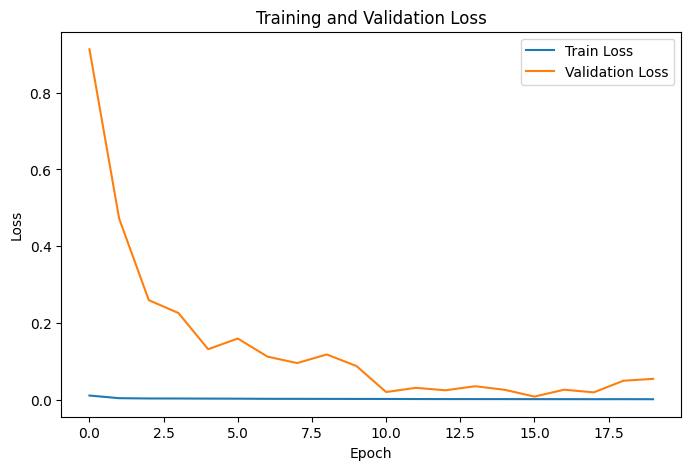

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<ipython-input-1-10d40ced4257>:82: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_entry[feature_cols.index("Close")] = pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted stock prices for the next week: [214.11582334 199.16075591 179.95785086 158.6776822  137.17490227
 116.87525067  98.6946345 ]


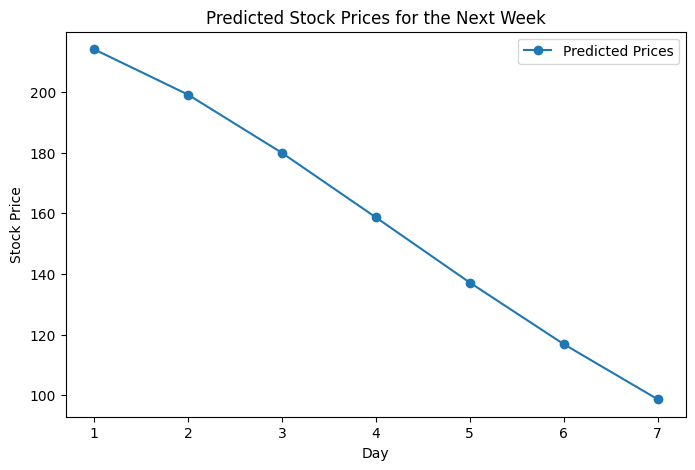

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
df = pd.read_csv("/content/World-Stock-Prices-Dataset.csv")

# Filter for Apple (AAPL) stock data
df_apple = df[df["Ticker"] == "AAPL"].copy()
df_apple["Date"] = pd.to_datetime(df_apple["Date"])
df_apple = df_apple.sort_values("Date").reset_index(drop=True)

# Select relevant columns
feature_cols = ["Open", "High", "Low", "Close", "Volume"]
data = df_apple[feature_cols].values

# Apply z-score normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Prepare data for time series (window size = 60)
window_size = 60
X, y = [], []
for i in range(window_size, len(data_scaled)):
    X.append(data_scaled[i - window_size:i])
    y.append(data_scaled[i, feature_cols.index("Close")])

X = np.array(X)
y = np.array(y)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build model4
model4 = Sequential()
model4.add(LSTM(50, return_sequences=True, input_shape=(window_size, len(feature_cols)),
                kernel_initializer="glorot_uniform"))
model4.add(Dropout(0.3))
model4.add(LSTM(50, kernel_initializer="glorot_uniform"))
model4.add(Dropout(0.3))
model4.add(Dense(1))  # Output layer

# Compile the model
model4.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error")

# Train the model
history = model4.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Forecast the next 7 days
def predict_next_week(model, last_sequence, scaler, num_days=7):
    predictions = []
    input_seq = last_sequence.copy()

    for _ in range(num_days):
        input_seq = input_seq.reshape((1, input_seq.shape[0], input_seq.shape[1]))
        pred = model.predict(input_seq)

        predictions.append(pred[0, 0])
        new_entry = np.zeros((input_seq.shape[2],))
        new_entry[feature_cols.index("Close")] = pred
        input_seq = np.append(input_seq[0, 1:, :], [new_entry], axis=0)

    temp = np.zeros((len(predictions), len(feature_cols)))
    temp[:, feature_cols.index("Close")] = predictions
    inv_predictions = scaler.inverse_transform(temp)[:, feature_cols.index("Close")]

    return inv_predictions

# Use the last window of data for prediction
last_sequence = data_scaled[-window_size:]
next_week_predictions = predict_next_week(model4, last_sequence, scaler, num_days=7)

# Print predicted prices
print("Predicted stock prices for the next week:", next_week_predictions)

# Plot predictions
plt.figure(figsize=(8, 5))
plt.plot(range(1, 8), next_week_predictions, marker="o", label="Predicted Prices")
plt.title("Predicted Stock Prices for the Next Week")
plt.xlabel("Day")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


lstm with attention head

<ipython-input-5-db7c14ed1b3b>:15: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_apple["Date"] = pd.to_datetime(df_apple["Date"])


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 60, 5)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_4 (LSTM)             │ [(None, 60, 50),       │         11,200 │ input_layer_4[0][0]    │
│                           │ (None, 50), (None,     │                │                        │
│                           │ 50)]                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 60, 50)         │              0 │ lstm_4[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_5 (LSTM)             │ [(None, 60, 50),       │         20,200 │ dropout_4[0][0]        │
│                           │ (None, 50), (None,     │                │                        │
│                           │ 50)]                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 60, 50)         │              0 │ lstm_5[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_2 (Attention)   │ (None, 50)             │              0 │ dropout_5[0][0],       │
│                           │                        │                │ lstm_4[0][1]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 100)            │              0 │ attention_2[0][0],     │
│ (Concatenate)             │                        │                │ lstm_4[0][1]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 10)             │          1,010 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 1)              │             11 │ dense_8[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 32,421 (126.64 KB)

 Trainable params: 32,421 (126.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 2.1836 - val_loss: 1.1910
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2039 - val_loss: 1.1910
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1942 - val_loss: 1.1910
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1987 - val_loss: 1.1910
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1800 - val_loss: 1.1910
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2002 - val_loss: 1.1910
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2012 - val_loss: 1.1910
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2042 - val_loss: 1.1910
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2076 - val_loss: 1.1910
Epoch 10/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1914 - val_loss: 1.1910
Epoch 11/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1876 - val_loss: 1.1910
Epoch 12/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Forecasted stock prices for the next week: [104.18078504 104.18078504 104.18078504 104.18078504 104.18078504
 104.18078504 104.18078504]


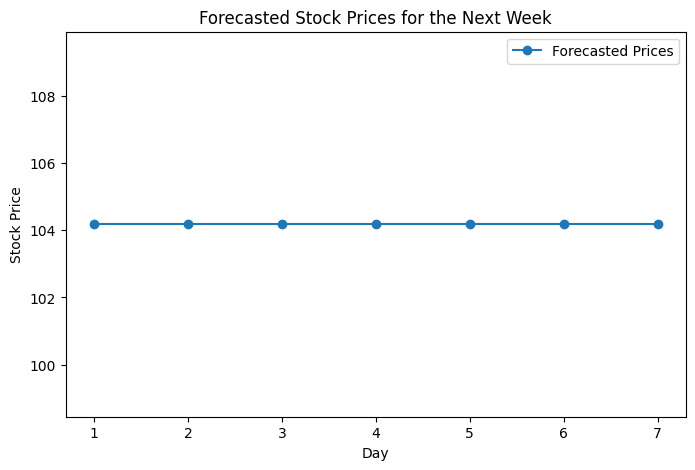

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Concatenate, Softmax
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/World-Stock-Prices-Dataset.csv")

# Filter for Apple (AAPL) stock data
df_apple = df[df["Ticker"] == "AAPL"].copy()
df_apple["Date"] = pd.to_datetime(df_apple["Date"])
df_apple = df_apple.sort_values("Date").reset_index(drop=True)

# Select relevant columns
feature_cols = ["Open", "High", "Low", "Close", "Volume"]
data = df_apple[feature_cols].values

# Apply z-score normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Prepare data for time series (window size = 60)
window_size = 60
X, y = [], []
for i in range(window_size, len(data_scaled)):
    X.append(data_scaled[i - window_size:i])
    y.append(data_scaled[i, feature_cols.index("Close")])

X = np.array(X)
y = np.array(y)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define attention mechanism
class Attention(tf.keras.layers.Layer):
    def __init__(self):
        super(Attention, self).__init__()

    def call(self, inputs):
        # inputs: [lstm_output, hidden_state]
        lstm_output, hidden_state = inputs

        # Calculate attention weights
        hidden_with_time_axis = tf.expand_dims(hidden_state, axis=1)  # Shape: (batch_size, 1, lstm_units)
        score = tf.nn.tanh(tf.keras.layers.Dot(axes=[2, 2])([lstm_output, hidden_with_time_axis]))
        attention_weights = tf.nn.softmax(score, axis=1)  # Shape: (batch_size, timesteps, 1)

        # Weighted sum of LSTM outputs
        context_vector = tf.reduce_sum(attention_weights * lstm_output, axis=1)  # Shape: (batch_size, lstm_units)
        return context_vector

# Define Model 5 (Matching Paper Architecture)
random_seed = 42
num_features = len(feature_cols)  # Based on your data

input_layer = Input(shape=(window_size, num_features))

# First LSTM layer
lstm1_output, state_h, state_c = LSTM(50, return_sequences=True, return_state=True,
                                      kernel_initializer=tf.keras.initializers.glorot_uniform(seed=random_seed))(input_layer)
dropout1 = Dropout(0.3)(lstm1_output)

# Second LSTM layer
lstm2_output, _, _ = LSTM(50, return_sequences=True, return_state=True,
                          kernel_initializer=tf.keras.initializers.glorot_uniform(seed=random_seed))(dropout1)
dropout2 = Dropout(0.3)(lstm2_output)

# Attention mechanism
attention_layer = Attention()([dropout2, state_h])

# Concatenate attention output with the last LSTM state
concatenated = Concatenate()([attention_layer, state_h])

# Dense layer followed by Softmax (as per paper)
dense_layer = Dense(10, activation="relu")(concatenated)
softmax_output = Dense(1, activation="softmax")(dense_layer)

model5 = Model(inputs=input_layer, outputs=softmax_output)
model5.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error")

# Print model summary
model5.summary()

# Train the model
history = model5.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Forecasting function
def forecast_next_week_with_attention(model, last_sequence, num_days=7):
    predictions = []
    input_seq = last_sequence.copy()

    for _ in range(num_days):
        input_seq = np.reshape(input_seq, (1, input_seq.shape[0], input_seq.shape[1]))  # Reshape for model input
        pred = model.predict(input_seq, verbose=0)[0, 0]  # Get the prediction

        # Update input sequence with the predicted value
        new_entry = np.zeros((input_seq.shape[2],))
        new_entry[feature_cols.index("Close")] = pred
        input_seq = np.append(input_seq[0, 1:, :], [new_entry], axis=0)

        predictions.append(pred)

    # Inverse transform predictions back to original scale
    temp = np.zeros((len(predictions), len(feature_cols)))
    temp[:, feature_cols.index("Close")] = predictions
    inv_predictions = scaler.inverse_transform(temp)[:, feature_cols.index("Close")]

    return inv_predictions

# Use the last window of data for prediction
last_sequence = data_scaled[-window_size:]
next_week_forecast = forecast_next_week_with_attention(model5, last_sequence, num_days=7)

# Print and plot the forecast
print("Forecasted stock prices for the next week:", next_week_forecast)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(next_week_forecast) + 1), next_week_forecast, marker="o", label="Forecasted Prices")
plt.title("Forecasted Stock Prices for the Next Week")
plt.xlabel("Day")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

Maybe deep q learning

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from collections import deque
import random

# Load the dataset
df = pd.read_csv("/content/World-Stock-Prices-Dataset.csv")

# Filter for Apple (AAPL) stock data
df_apple = df[df["Ticker"] == "AAPL"].copy()
df_apple["Date"] = pd.to_datetime(df_apple["Date"])
df_apple = df_apple.sort_values("Date").reset_index(drop=True)

# Select relevant columns
feature_cols = ["Open", "High", "Low", "Close", "Volume"]
data = df_apple[feature_cols].values

# Define the environment class
class TradingEnvironment:
    def __init__(self, data):
        self.data = data
        self.n_features = data.shape[1]
        self.current_step = 0
        self.balance = 10000
        self.shares_held = 0
        self.total_profit = 0
        self.max_steps = len(data) - 1

    def reset(self):
        self.current_step = 0
        self.balance = 10000
        self.shares_held = 0
        self.total_profit = 0
        return self._get_state()

    def step(self, action):
        # Action: 0 = Hold, 1 = Buy, 2 = Sell
        current_price = self.data[self.current_step, feature_cols.index("Close")]
        reward = 0

        if action == 1:  # Buy
            if self.balance > current_price:
                self.shares_held += 1
                self.balance -= current_price
        elif action == 2:  # Sell
            if self.shares_held > 0:
                self.shares_held -= 1
                self.balance += current_price
                reward = current_price - self.data[self.current_step - 1, feature_cols.index("Close")]

        self.current_step += 1
        done = self.current_step >= self.max_steps
        next_state = self._get_state()
        return next_state, reward, done

    def _get_state(self):
        return self.data[self.current_step]

# Define the Deep Q-Learning Agent
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation="relu"))
        model.add(Dense(24, activation="relu"))
        model.add(Dense(self.action_size, activation="linear"))
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate), loss="mse")
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        q_values = self.model.predict(state, verbose=0)
        return np.argmax(q_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target += self.gamma * np.amax(self.model.predict(next_state, verbose=0)[0])
            target_f = self.model.predict(state, verbose=0)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Train the agent
env = TradingEnvironment(data)
state_size = env.n_features
action_size = 3  # Hold, Buy, Sell
agent = DQNAgent(state_size, action_size)
episodes = 100
batch_size = 32

for e in range(episodes):
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    for time in range(env.max_steps):
        action = agent.act(state)
        next_state, reward, done = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        if done:
            print(f"Episode {e + 1}/{episodes}, Total Profit: {env.total_profit}, Epsilon: {agent.epsilon:.2}")
            break
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)

# Forecasting the next week with the trained model
def forecast_next_week(agent, env, num_days=7):
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    predictions = []
    for _ in range(num_days):
        action = agent.act(state)
        current_price = env.data[env.current_step, feature_cols.index("Close")]
        predictions.append(current_price)
        _, _, done = env.step(action)
        state = env._get_state()
        state = np.reshape(state, [1, state_size])
        if done:
            break
    return predictions

# Use the trained model to forecast
next_week_forecast = forecast_next_week(agent, env, num_days=7)
print("Forecasted stock prices for the next week:", next_week_forecast)

# Plot the forecasted prices
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(next_week_forecast) + 1), next_week_forecast, marker="o", label="Forecasted Prices")
plt.title("Forecasted Stock Prices for the Next Week")
plt.xlabel("Day")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


<ipython-input-2-131f1b5ebb30>:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_apple["Date"] = pd.to_datetime(df_apple["Date"])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


xlstm


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step - loss: 0.0011 - val_loss: 0.0359
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - loss: 1.3838e-04 - val_loss: 0.0223
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - loss: 1.2692e-04 - val_loss: 0.0444
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - loss: 1.1084e-04 - val_loss: 0.0326
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - loss: 1.1665e-04 - val_loss: 0.0364
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - loss: 9.7338e-05 - val_loss: 0.0316
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - loss: 9.8882e-05 - val_loss: 0.0252
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - loss: 9.5657e-05 - val_loss: 0.0321
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - loss: 8.6442e-05 - val_loss: 0.0347
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - loss: 8.3286e-05 - val_loss: 0.0401
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - loss: 8.5470e-05 - va

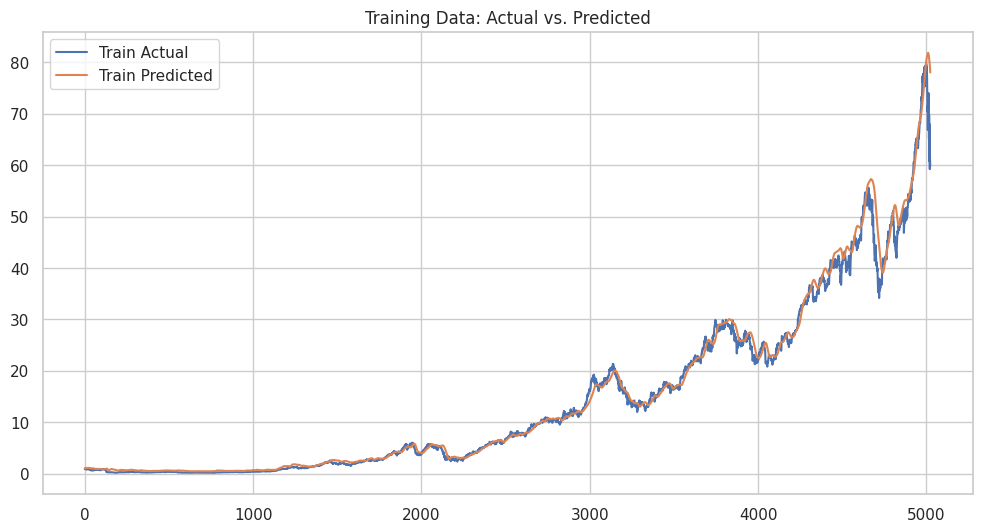

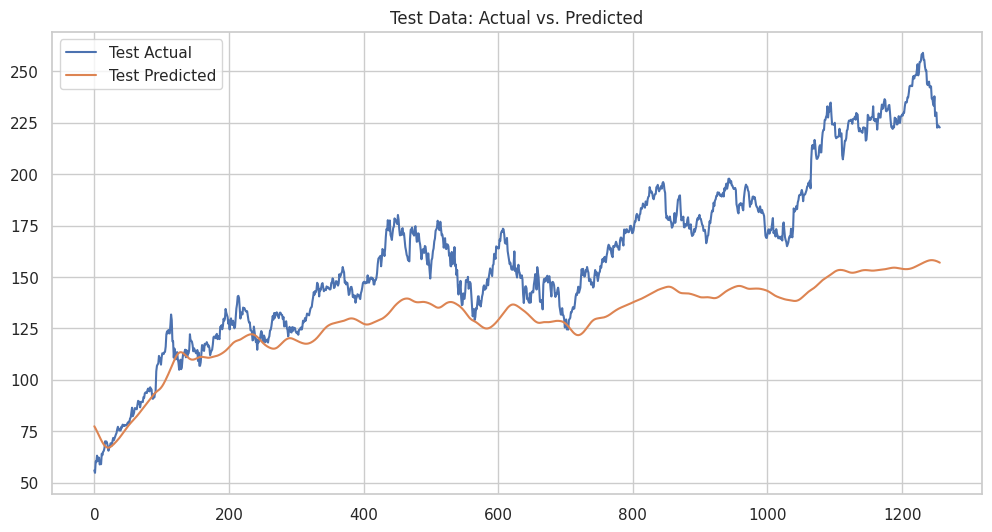

Train RMSE: 1.72
Train R-squared: 0.99
Test RMSE: 38.62
Test R-squared: 1.00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# --- Data Preparation (Assuming you have your 'df_clean' DataFrame) ---

# 1. Select and prepare data for a specific ticker (e.g., "AAPL")
df_apple = df_clean[df_clean["Ticker"] == "AAPL"].copy()
df_apple["Date"] = pd.to_datetime(df_apple["Date"], utc=True)
df_apple = df_apple.sort_values("Date")
df_apple.reset_index(drop=True, inplace=True)

# 2. Feature selection and scaling
feature_cols = ["Open", "High", "Low", "Close", "Volume"]
df_features = df_apple[feature_cols]
data = df_features.values
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# 3. Create sequences for training
window_size = 60  # Adjust as needed
X, y = [], []
for i in range(window_size, len(data_scaled)):
    X.append(data_scaled[i - window_size:i, :])
    y.append(data_scaled[i, 3])  # Predict closing price
X = np.array(X)
y = np.array(y)

# 4. Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# --- Define the XLSTM Model ---

def xlstm_model(window_size, feature_cols):
    """
    Creates a vanilla Xception-like LSTM model for stock prediction.

    Args:
        window_size: Size of the window used for past data points.
        feature_cols: Number of features used for prediction.

    Returns:
        A compiled TensorFlow Keras model.
    """

    model = Sequential()

    # Entry block (similar to Xception)
    model.add(LSTM(32, return_sequences=True, input_shape=(window_size, feature_cols)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.2))

    # Middle block (multiple LSTM layers)
    for _ in range(2):
        model.add(LSTM(64, return_sequences=True))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.2))

    # Exit block (similar to Xception)
    model.add(LSTM(32))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.2))

    model.add(Dense(1))  # Output layer for predicted closing price

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error")
    return model

# --- Train the Model ---

model5xlstm = xlstm_model(window_size, len(feature_cols))

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model5xlstm.fit(
    X_train, y_train,
    epochs=50,  # Adjust as needed
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

# --- Make Predictions ---

y_pred_train = model5xlstm.predict(X_train)
y_pred_test = model5xlstm.predict(X_test)

# --- Inverse Transform to Original Scale ---

def inverse_transform_predictions(y_pred, y_true, scaler):
    """
    Inverts the scaling of predicted and true values.

    Args:
        y_pred: Predicted values.
        y_true: True values.
        scaler: MinMaxScaler object used for scaling.

    Returns:
        Inversed predicted and true values.
    """
    temp_pred = np.zeros((len(y_pred), len(feature_cols)))
    temp_pred[:, 3] = y_pred[:, 0]
    inv_pred = scaler.inverse_transform(temp_pred)
    inv_pred_close = inv_pred[:, 3]

    temp_true = np.zeros((len(y_true), len(feature_cols)))
    temp_true[:, 3] = y_true
    inv_true = scaler.inverse_transform(temp_true)
    inv_true_close = inv_true[:, 3]

    return inv_pred_close, inv_true_close

inv_y_pred_train, inv_y_train = inverse_transform_predictions(y_pred_train, y_train, scaler)
inv_y_pred_test, inv_y_test = inverse_transform_predictions(y_pred_test, y_test, scaler)

# --- Plot Results ---

plt.figure(figsize=(12, 6))
plt.plot(inv_y_train, label="Train Actual")
plt.plot(inv_y_pred_train, label="Train Predicted")
plt.title("Training Data: Actual vs. Predicted")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(inv_y_test, label="Test Actual")
plt.plot(inv_y_pred_test, label="Test Predicted")
plt.title("Test Data: Actual vs. Predicted")
plt.legend()
plt.show()

# --- Evaluate Model (Optional) ---

from sklearn.metrics import mean_squared_error, r2_score

rmse_train = np.sqrt(mean_squared_error(inv_y_train, inv_y_pred_train))
r2_train = r2_score(inv_y_train, inv_y_pred_train)

rmse_test = np.sqrt(mean_squared_error(inv_y_test, inv_y_pred_test))
r2_test = r2_score(inv_y_test, inv_y_test)

print(f"Train RMSE: {rmse_train:.2f}")
print(f"Train R-squared: {r2_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test R-squared: {r2_test:.2f}")

In [ ]:
!pip uninstall xlstm

In [ ]:
!pip uninstall xlstm
!pip install --force-reinstall git+https://github.com/NX-AI/xlstm.git

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from xlstm.layers import sLSTM, mLSTM

# --- Data Preparation (Assuming you have your 'df_clean' DataFrame) ---

# 1. Select and prepare data for a specific ticker (e.g., "AAPL")
df_apple = df_clean[df_clean["Ticker"] == "AAPL"].copy()
df_apple["Date"] = pd.to_datetime(df_apple["Date"], utc=True)
df_apple = df_apple.sort_values("Date")
df_apple.reset_index(drop=True, inplace=True)

# 2. Feature selection and scaling
feature_cols = ["Open", "High", "Low", "Close", "Volume"]
df_features = df_apple[feature_cols]
data = df_features.values
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# 3. Create sequences for training
window_size = 60  # Adjust as needed
X, y = [], []
for i in range(window_size, len(data_scaled)):
    X.append(data_scaled[i - window_size:i, :])
    y.append(data_scaled[i, 3])  # Predict closing price
X = np.array(X)
y = np.array(y)

# 4. Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# --- Define the XLSTM Model ---

def xlstm_model(window_size, feature_cols):
    """
    Creates an XLSTM model for stock prediction.

    Args:
        window_size: Size of the window used for past data points.
        feature_cols: Number of features used for prediction.

    Returns:
        A compiled TensorFlow Keras model.
    """

    model = Sequential()

    # Entry block
    model.add(sLSTM(32, return_sequences=True, input_shape=(window_size, feature_cols)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.2))

    # Middle block (multiple sLSTM and mLSTM layers)
    model.add(mLSTM(64, return_sequences=True))  # Add mLSTM layer
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.2))

    model.add(sLSTM(64, return_sequences=True))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.2))

    # Exit block
    model.add(sLSTM(32))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.2))

    model.add(Dense(1))  # Output layer for predicted closing price

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error")
    return model

# --- Train the Model ---

model5xlstm = xlstm_model(window_size, len(feature_cols))

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model5xlstm.fit(
    X_train, y_train,
    epochs=50,  # Adjust as needed
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

# --- Save the Trained Model ---
model5xlstm.save("xlstm_stock_model.h5")
print("Model saved successfully!")

# --- Make Predictions (Optional) ---
# (Uncomment this block to make predictions after training)
# y_pred_train = model5xlstm.predict(X_train)
# y_pred_test = model5xlstm.predict(X_test)

# --- Inverse Transform to Original Scale ---

def inverse_transform_predictions(y_pred, y_true, scaler):
    """
    Inverts the scaling of predicted and true values.

    Args:
        y_pred: Predicted values.
        y_true: True values.
        scaler: MinMaxScaler object used for scaling.

    Returns:
        Inversed predicted and true values.
    """
    temp_pred = np.zeros((len(y_pred), len(feature_cols)))
    temp_pred[:, 3] = y_pred[:, 0]
    inv_pred = scaler.inverse_transform(temp_pred)
    inv_pred_close = inv_pred[:, 3]

    temp_true = np.zeros((len(y_true), len(feature_cols)))
    temp_true[:, 3] = y_true
    inv_true = scaler.inverse_transform(temp_true)
    inv_true_close = inv_true[:, 3]

    return inv_pred_close, inv_true_close

# --- Plot Results ---

plt.figure(figsize=(12, 6))
plt.plot(inv_y_train, label="Train Actual")
plt.plot(inv_y_pred_train, label="Train Predicted")
plt.title("Training Data: Actual vs. Predicted")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(inv_y_test, label="Test Actual")
plt.plot(inv_y_pred_test, label="Test Predicted")
plt.title("Test Data: Actual vs. Predicted")
plt.legend()
plt.show()

# --- Evaluate Model (Optional) ---

from sklearn.metrics import mean_squared_error, r2_score

rmse_train = np.sqrt(mean_squared_error(inv_y_train, inv_y_pred_train))
r2_train = r2_score(inv_y_train, inv_y_pred_train)

rmse_test = np.sqrt(mean_squared_error(inv_y_test, inv_y_pred_test))
r2_test = r2_score(inv_y_test, inv_y_test)

print(f"Train RMSE: {rmse_train:.2f}")
print(f"Train R-squared: {r2_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test R-squared: {r2_test:.2f}")

  Cloning https://github.com/NX-AI/xlstm.git to /tmp/pip-req-build-valstnlc
  Running command git clone --filter=blob:none --quiet https://github.com/NX-AI/xlstm.git /tmp/pip-req-build-valstnlc
  Resolved https://github.com/NX-AI/xlstm.git to commit 5feeeaf11b973e37b960553bd8749ca9dadbdfe4
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 75.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.

ModuleNotFoundError: No module named 'xlstm.layers'

In [ ]:
!pip show xlstm

Name: xlstm
Version: 2.0.2
Summary: A novel LSTM variant with promising performance compared to Transformers or State Space Models.
Home-page: 
Author: 
Author-email: Maximilian Beck <beck@ml.jku.at>, Korbinian Poeppel <poeppel@ml.jku.at>, Andreas Auer <auer@ml.jku.at>
License: 
                              Apache License
                        Version 2.0, January 2004
                     http://www.apache.org/licenses/

TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION

1. Definitions.

   "License" shall mean the terms and conditions for use, reproduction,
   and distribution as defined by Sections 1 through 9 of this document.

   "Licensor" shall mean the copyright owner or entity authorized by
   the copyright owner that is granting the License.

   "Legal Entity" shall mean the union of the acting entity and all
   other entities that control, are controlled by, or are under common
   control with that entity. For the purposes of this definition,
   "control" means

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from xlstm.layers import sLSTM, mLSTM

# --- Data Preparation (Assuming you have your 'df_clean' DataFrame) ---

# 1. Select and prepare data for a specific ticker (e.g., "AAPL")
df_apple = df_clean[df_clean["Ticker"] == "AAPL"].copy()
df_apple["Date"] = pd.to_datetime(df_apple["Date"], utc=True)
df_apple = df_apple.sort_values("Date")
df_apple.reset_index(drop=True, inplace=True)

# 2. Feature selection and scaling
feature_cols = ["Open", "High", "Low", "Close", "Volume"]
df_features = df_apple[feature_cols]
data = df_features.values
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# 3. Create sequences for training
window_size = 60  # Adjust as needed
X, y = [], []
for i in range(window_size, len(data_scaled)):
    X.append(data_scaled[i - window_size:i, :])
    y.append(data_scaled[i, 3])  # Predict closing price
X = np.array(X)
y = np.array(y)

# 4. Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# --- Define the XLSTM Model ---

def xlstm_model(window_size, feature_cols):
    """
    Creates an XLSTM model for stock prediction.

    Args:
        window_size: Size of the window used for past data points.
        feature_cols: Number of features used for prediction.

    Returns:
        A compiled TensorFlow Keras model.
    """

    model = Sequential()

    # Entry block
    model.add(sLSTM(32, return_sequences=True, input_shape=(window_size, feature_cols)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.2))

    # Middle block (multiple sLSTM and mLSTM layers)
    model.add(mLSTM(64, return_sequences=True))  # Add mLSTM layer
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.2))

    model.add(sLSTM(64, return_sequences=True))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.2))

    # Exit block
    model.add(sLSTM(32))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.2))

    model.add(Dense(1))  # Output layer for predicted closing price

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error")
    return model

# --- Train the Model ---

model5xlstm = xlstm_model(window_size, len(feature_cols))

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model5xlstm.fit(
    X_train, y_train,
    epochs=50,  # Adjust as needed
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

# --- Save the Trained Model ---
model5xlstm.save("xlstm_stock_model.h5")
print("Model saved successfully!")

# --- Make Predictions (Optional) ---
# (Uncomment this block to make predictions after training)
# y_pred_train = model5xlstm.predict(X_train)
# y_pred_test = model5xlstm.predict(X_test)

# --- Inverse Transform to Original Scale ---

def inverse_transform_predictions(y_pred, y_true, scaler):
    """
    Inverts the scaling of predicted and true values.

    Args:
        y_pred: Predicted values.
        y_true: True values.
        scaler: MinMaxScaler object used for scaling.

    Returns:
        Inversed predicted and true values.
    """
    temp_pred = np.zeros((len(y_pred), len(feature_cols)))
    temp_pred[:, 3] = y_pred[:, 0]
    inv_pred = scaler.inverse_transform(temp_pred)
    inv_pred_close = inv_pred[:, 3]

    temp_true = np.zeros((len(y_true), len(feature_cols)))
    temp_true[:, 3] = y_true
    inv_true = scaler.inverse_transform(temp_true)
    inv_true_close = inv_true[:, 3]

    return inv_pred_close, inv_true_close

# --- Plot Results ---

plt.figure(figsize=(12, 6))
plt.plot(inv_y_train, label="Train Actual")
plt.plot(inv_y_pred_train, label="Train Predicted")
plt.title("Training Data: Actual vs. Predicted")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(inv_y_test, label="Test Actual")
plt.plot(inv_y_pred_test, label="Test Predicted")
plt.title("Test Data: Actual vs. Predicted")
plt.legend()
plt.show()

# --- Evaluate Model (Optional) ---

from sklearn.metrics import mean_squared_error, r2_score

rmse_train = np.sqrt(mean_squared_error(inv_y_train, inv_y_pred_train))
r2_train = r2_score(inv_y_train, inv_y_pred_train)

rmse_test = np.sqrt(mean_squared_error(inv_y_test, inv_y_pred_test))
r2_test = r2_score(inv_y_test, inv_y_test)

print(f"Train RMSE: {rmse_train:.2f}")
print(f"Train R-squared: {r2_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test R-squared: {r2_test:.2f}")

ModuleNotFoundError: No module named 'xlstm.layers'

In [ ]:
# --- Save the Trained Model ---
model5xlstm.save("xlstm_stock_model.h5")
print("Model saved successfully!")
